# Combined Cycle Power Plant Energy Prediction
# Using Artificial Neural Network

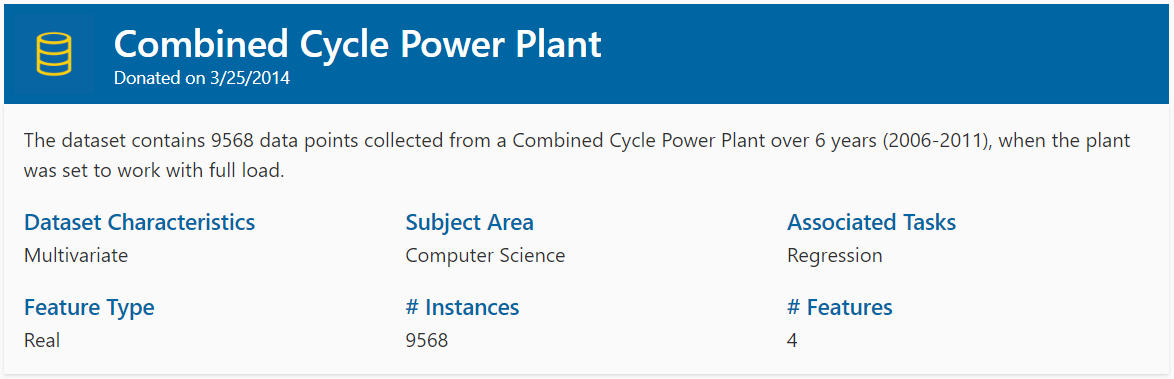


[UCML Dataset](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant)
#####The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

## Importing required libraries
### **Numpy**
##### Using for array computation.
```
import numpy as np
```
### **Pandas**
##### using for importing dataset and perform operations.
```
import pandas as pd
```
### **Tensorflow**
##### For ANN Neural Network framework and libraries.
```
import tensorflow as tf
```
### **Scikit-learn**
##### For model selection
```
from sklearn.model_selection import train_test_split
```

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
tf.__version__

'2.15.0'

In [13]:
dataset = pd.read_excel('/content/Folds5x2_pp.xlsx')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
print("\n--------------------\n")
print("Independent variable")
print(X)
print("\n--------------------\n")
print("Dependent variable")
print(y)
print("\n--------------------\n")


--------------------

Independent variable
[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]

--------------------

Dependent variable
[463.26 444.37 488.56 ... 429.57 435.74 453.28]

--------------------



In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Creating a neural network

Creating a sequential neural network as problem is simple regression.<br>
Adding 2 hidden layers (fully connected)

*   **Activation Function** = ReLU Activation Function<br>
    ReLU : Rectified Linear Activation Function, which adds non-linearity to the model to learn complex relations.
    f(x) = max(0,x)

*   **Units** = 6 (no of neuron units in each layer)



In [17]:
ann = tf.keras.models.Sequential()

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer='adam',loss='mean_squared_error')
ann.fit(X_train,y_train,epochs=100,batch_size = 32)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 67027.4141
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 732.3052
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 393.3601
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 367.9055
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 343.9471
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 330.7123
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 316.0576
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 299.8680
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 281.7331
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 262.6687
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 241.7402
Epoch 12/100
240/240 [==============================] - 0s 2ms/step - lo

In [19]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)


60/60 [==============================] - 0s 1ms/step


In [20]:
y_pred

array([[429.5 ],
       [460.35],
       [463.79],
       ...,
       [471.03],
       [438.01],
       [457.11]], dtype=float32)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2) (%):", r2*100)

Mean Absolute Error (MAE): 4.181627712588574
Mean Squared Error (MSE): 28.304669391988362
Root Mean Squared Error (RMSE): 5.320213284445311
Coefficient of Determination (R^2) (%): 90.32278749529053
